1. Make a polygon of area want to look at.

In [96]:
import numpy as np
import rasterio as rio

import os
import sys
import geopandas as gpd
import shapely as sp
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


#working_dir = '/Volumes/arc_02/REMOTE_SENSING/'
working_dir = '/Users/home/whitefar/DATA/Icesat2/Reference_ground_tracks/'

sys.path.append(os.path.abspath(working_dir))
sys.path.append(os.path.abspath('/Users/home/whitefar/DATA/code/'))
sys.path.append(os.path.abspath('/Users/home/whitefar/DATA/Channel/line_channel_traced_for_50kms/'))
os.chdir(working_dir)

In [97]:
channel_file = gpd.read_file('line_channel_traced_for_50kms.shp')

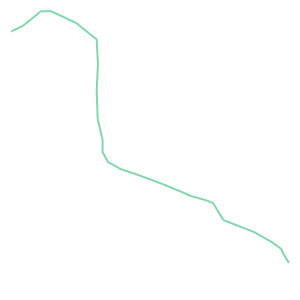

In [234]:
channel = channel_file.iloc[0].geometry
channel_coords = np.array(list(channel.coords))
channel_list = list(channel.coords)
channel

In [123]:
width = 5000

In [124]:
a = channel_coords[0]
b = channel_coords[1]
b

array([-378084.82741615, -726960.0122061 ])

In [128]:
grad =( a[1] - b[1]) /( a[0] - b[0 ])
t_1 = np.arctan(grad)
t_2 = t_1 + np.pi/2
grad

-1.6666666666667467

In [130]:
d = np.array([a[0] + width*np.cos(t_2) , a[1] + width*np.sin(t_2)])
grad_2 = ( a[1] - d[1]) /( a[0] - d[0 ])
-1/grad_2

-1.666666666666727

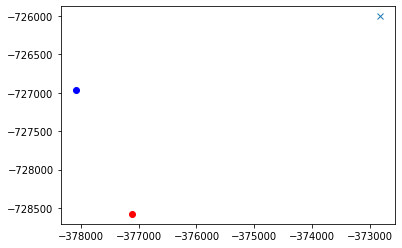

In [136]:
plt.plot(a[0],a[1],'ro')
plt.plot(b[0],b[1],'bo')
plt.plot(d[0],d[1],'x')

In [205]:
t_1[16]


-1.5707963267948966

In [246]:
channel_gradient_ = (channel_coords[:-1,1]-channel_coords[1:,1])/(channel_coords[:-1,0]-channel_coords[1:,0])
channel_gradient = np.hstack((channel_gradient_,channel_gradient_[-1]))
t_1 = np.arctan(channel_gradient)

t_1[19] = np.arctan(channel_gradient[19])+np.pi

t_2 = t_1 + np.pi/2
t_3 = t_1 - np.pi/2



/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


There is a problem here, see hard coded t_1, in above box. arctan cant handle overhanging slope

In [248]:
channel_west =np.vstack([channel_coords[:,0]-shape_thickness*np.cos(t_2),channel_coords[:,1]-shape_thickness*np.sin(t_2)]).T
channel_east =np.vstack([channel_coords[:,0]-shape_thickness*np.cos(t_3),channel_coords[:,1]-shape_thickness*np.sin(t_3)]).T

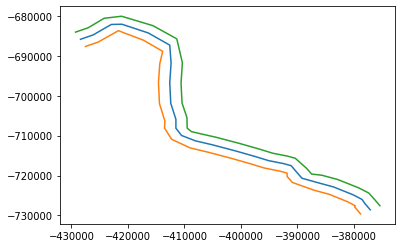

In [250]:
plt.plot(channel_coords[:,0],channel_coords[:,1])
plt.plot(channel_west[:,0],channel_west[:,1])
plt.plot(channel_east[:,0],channel_east[:,1])

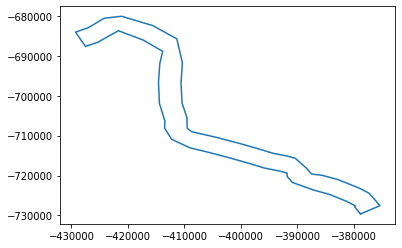

In [266]:
perimeter_ = np.vstack((channel_west,np.flipud(channel_east)))
perimeter = np.vstack((perimeter_,perimeter_[0]))
plt.plot(perimeter[:,0],perimeter[:,1])

In [277]:
perimeter_geom =  sp.geometry.Polygon(perimeter)

In [281]:
channel_area = channel_file
channel_area.iloc[0].geometry = perimeter_geom

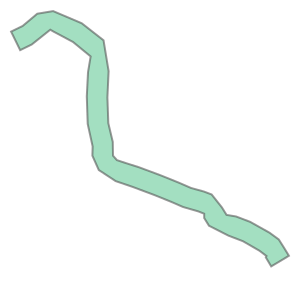

In [282]:
channel_wide.iloc[0].geometry

In [283]:
channel_area.to_file("channel_area.shp")

In [280]:
# '/Users/home/whitefar/DATA/Channel/line_channel_traced_for_50kms/cropped_stripes/'

'/Users/home/whitefar/DATA/Channel/line_channel_traced_for_50kms/cropped_stripes/'